#  Car Accident Severity Report

## Applied Data Science Capstone - IBM/Coursera

## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Results & Evaluation](#results)
* [Discussion](#discussion)
* [Conclusion](#conclusion)

## Introduction | Business Understanding <a name="introduction"></a>


* Road traffic injuries are currently estimated to be the eighth leading cause of death across all age groups globally, and are predicted to become the seventh leading cause of death by 2030.

* Analysing a significant range of factors, including weather conditions, special events, roadworks, traffic jams among others, an accurate prediction of the severity of the accidents can be performed.

* In an effort to reduce the frequency of car collisions in a community, an algorithm must be developed to predict the severity of an accident given the current weather, road and visibility conditions. In an application, drivers will be alerted of the severity level when conditions are above code 0.


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Data

In [2]:
df =pd.read_csv('Data-Collisions.csv')
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


## Check data using describe()

In [3]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [4]:
df.shape

(194673, 38)

In [5]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

## Data Understanding<a name="data"></a>

Our predictor or target variable will be 'SEVERITYCODE' because it is used to measure the severity of an accident from 0 to 4 within the dataset. Attributes used to weigh the severity of an accident are 'WEATHER', 'ROADCOND' and 'LIGHTCOND'.

Severity codes are as follows:

* 0 : Little to no Probability (Clear Conditions)
* 1 : Very Low Probability - Chance or Property Damage
* 2 : Low Probability - Chance of Injury
* 3 : Mild Probability - Chance of Serious Injury
* 4 : High Probability - Chance of Fatality

### Extract Dataset & Convert

From the summary of the data we see that the data types are coherent with their respective values, with the only exception of the date, and that some features have missing values. 

+ More than half of the values for the coordenates are missig, as well as roughly a 10% of the data regarding the road_num and more than a 50% of the remaining samples are a 0. Thus, to keep the amount of samples the mentioned features will be dropped. 

+ Few values are missing in some features such as the atmospheric conditions or road category.


Missing values and outliers will be filled with the label for *Other cases* category if possible. If not the most frequent value of the feature will be applyed.

In [20]:
# Drop all columns with no predictive value for the context of this project
colData = df.drop(columns = ['OBJECTID', 'SEVERITYCODE.1', 'REPORTNO', 'INCKEY', 'COLDETKEY', 
              'X', 'Y', 'STATUS','ADDRTYPE',
              'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
              'EXCEPTRSNDESC', 'SEVERITYDESC', 'INCDATE',
              'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
              'SDOT_COLDESC', 'PEDROWNOTGRNT', 'SDOTCOLNUM',
              'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY',
              'CROSSWALKKEY', 'HITPARKEDCAR', 'PEDCOUNT', 'PEDCYLCOUNT',
              'PERSONCOUNT', 'VEHCOUNT', 'COLLISIONTYPE',
              'SPEEDING', 'UNDERINFL', 'INATTENTIONIND'])

# Label Encoding
# Convert column to category
colData["WEATHER"] = colData["WEATHER"].astype('category')
colData["ROADCOND"] = colData["ROADCOND"].astype('category')
colData["LIGHTCOND"] = colData["LIGHTCOND"].astype('category')

# Assign variable to new column for analysis
colData["WEATHER_CAT"] = colData["WEATHER"].cat.codes
colData["ROADCOND_CAT"] = colData["ROADCOND"].cat.codes
colData["LIGHTCOND_CAT"] = colData["LIGHTCOND"].cat.codes

colData.head(5)

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,WEATHER_CAT,ROADCOND_CAT,LIGHTCOND_CAT
0,2,Overcast,Wet,Daylight,4,8,5
1,1,Raining,Wet,Dark - Street Lights On,6,8,2
2,1,Overcast,Dry,Daylight,4,0,5
3,1,Clear,Dry,Daylight,1,0,5
4,2,Raining,Wet,Daylight,6,8,5


In [21]:
colData.dtypes

SEVERITYCODE        int64
WEATHER          category
ROADCOND         category
LIGHTCOND        category
WEATHER_CAT          int8
ROADCOND_CAT         int8
LIGHTCOND_CAT        int8
dtype: object

In [22]:
colData["SEVERITYCODE"].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [28]:
colData["WEATHER"].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [29]:
colData["ROADCOND"].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [30]:
colData["LIGHTCOND"].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

#### Balancing the Dataset

Our target variable SEVERITYCODE is only 42% balanced. In fact, severitycode in class 1 is nearly three times the size of class 2.

We can fix this by downsampling the majority class.

### Down-sample Majority Class
Down-sampling involves randomly removing observations from the majority class to prevent its signal from dominating the learning algorithm.

The most common heuristic for doing so is resampling without replacement.

The process is similar to that of up-sampling. Here are the steps:

* 1.First, we'll separate observations from each class into different DataFrames.
* 2.Next, we'll resample the majority class without replacement, setting the number of samples to match that of the minority class.
* 3.Finally, we'll combine the down-sampled majority class DataFrame with the original minority class DataFrame.

In [33]:
from sklearn.utils import resample

In [34]:
# Seperate majority and minority classes
colData_majority = colData[colData.SEVERITYCODE==1]
colData_minority = colData[colData.SEVERITYCODE==2]

#Downsample majority class
colData_majority_downsampled = resample(colData_majority,
                                        replace=False,
                                        n_samples=58188,
                                        random_state=123)

# Combine minority class with downsampled majority class
colData_balanced = pd.concat([colData_majority_downsampled, colData_minority])

# Display new class counts
colData_balanced.SEVERITYCODE.value_counts()

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

In [39]:
colData_balanced.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,WEATHER_CAT,ROADCOND_CAT,LIGHTCOND_CAT
25055,1,Raining,Wet,Dark - Street Lights On,6,8,2
65280,1,Clear,Dry,Daylight,1,0,5
86292,1,Unknown,Unknown,Unknown,10,7,8
155111,1,Clear,Dry,Daylight,1,0,5
64598,1,Clear,Dry,Daylight,1,0,5


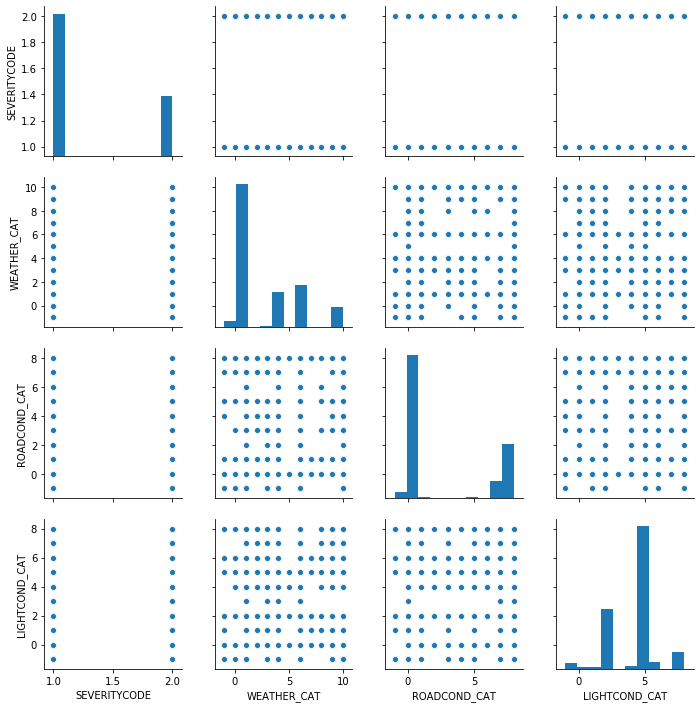

In [35]:
import seaborn as sns
sns.pairplot(colData)

## Methodology <a name="methodology"></a>

Our data is now ready to be fed into machine learning models.
<br><br>
We will use the following models:

##### K-Nearest Neighbor (KNN)
KNN will help us predict the severity code of an outcome by finding the most similar to data point within k distance.
##### Decision Tree
A decision tree model gives us a layout of all possible outcomes so we can fully analyze the consequences of a decision. It context, the decision tree observes all possible outcomes of different weather conditions.
##### Logistic Regression
Because our dataset only provides us with two severity code outcomes, our model will only predict one of those two classes. This makes our data binary, which is perfect to use with logistic regression.

### Initialization

#### Define X and y

In [40]:
import numpy as np
X = np.asarray(colData_balanced[['WEATHER_CAT', 'ROADCOND_CAT', 'LIGHTCOND_CAT']])
X[0:5]

array([[ 6,  8,  2],
       [ 1,  0,  5],
       [10,  7,  8],
       [ 1,  0,  5],
       [ 1,  0,  5]], dtype=int8)

In [41]:
y = np.asarray(colData_balanced['SEVERITYCODE'])
y [0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [42]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.15236718,  1.52797946, -1.21648407],
       [-0.67488   , -0.67084969,  0.42978835],
       [ 2.61416492,  1.25312582,  2.07606076],
       [-0.67488   , -0.67084969,  0.42978835],
       [-0.67488   , -0.67084969,  0.42978835]])

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (81463, 3) (81463,)
Test set: (34913, 3) (34913,)


### K-Nearest Neighbors (KNN)

In [45]:
# Building the KNN Model
from sklearn.neighbors import KNeighborsClassifier

k = 25

In [46]:
#Train Model & Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

Kyhat = neigh.predict(X_test)
Kyhat[0:5]

array([2, 2, 1, 1, 2], dtype=int64)

### Decision Tree

In [47]:
# Building the Decision Tree
from sklearn.tree import DecisionTreeClassifier
colDataTree = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
colDataTree
colDataTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [50]:
# Train Model & Predict
DTyhat = colDataTree.predict(X_test)
print (DTyhat[0:5])
print (y_test[0:5])

[2 2 1 1 2]
[2 2 1 1 1]


### Logistic Regression

In [51]:
# Building the LR Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=6, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=6, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
# Train Model & Predicr
LRyhat = LR.predict(X_test)
LRyhat

array([1, 2, 1, ..., 2, 2, 2], dtype=int64)

In [53]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.57295252, 0.42704748],
       [0.47065071, 0.52934929],
       [0.67630201, 0.32369799],
       ...,
       [0.46929132, 0.53070868],
       [0.47065071, 0.52934929],
       [0.46929132, 0.53070868]])

### 1.1. Random Forest
To go a bit further I will develop a Random Forest model. A random forest fits a number of **decision tree** classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The number of decision trees is specified with the `n_estimators` parameter.\
An upside of this algorithm is its `feature_importances_` atribut, it returns the impurity based feature importance.

In [67]:
from sklearn.ensemble import RandomForestClassifier
#Evaluation Metrics
import time
from sklearn.metrics import accuracy_score, log_loss, jaccard_similarity_score, classification_report
from sklearn.metrics import precision_score, recall_score, roc_curve

In [70]:
#Evaluation

model_rf = RandomForestClassifier(n_estimators=10, max_features=3, max_depth =12,criterion='entropy',random_state=0, n_jobs=-1)
model_rf.fit(X_train,y_train)
yhat_rf = model_rf.predict(X_test)
jaccard_rf = jaccard_similarity_score(y_test,yhat_rf)
c_rf = classification_report(y_test,yhat_rf)
prec_rf = precision_score(y_test, yhat_rf)
rec_rf = recall_score(y_test, yhat_rf)
print('Jaccard :',jaccard_rf,'\n',
     c_rf)

Jaccard : 0.5658064331337898 
               precision    recall  f1-score   support

           1       0.62      0.34      0.44     17409
           2       0.55      0.79      0.65     17504

    accuracy                           0.57     34913
   macro avg       0.58      0.57      0.54     34913
weighted avg       0.58      0.57      0.54     34913



C:\Users\LENOVO\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


## Results & Evaluation <a name="results"></a>

Now we will check the accuracy of our models.

In [55]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

#### K-Nearest Neighbor

In [56]:
# Jaccard Similarity Score
jaccard_similarity_score(y_test, Kyhat)

C:\Users\LENOVO\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.564001947698565

In [57]:
# F1-SCORE
f1_score(y_test, Kyhat, average='macro')

0.5401775308974308

<i>Model is most accurate when k is 25.</i>

#### Decision Tree

In [58]:
# Jaccard Similarity Score
jaccard_similarity_score(y_test, DTyhat)

C:\Users\LENOVO\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.5664365709048206

In [59]:
# F1-SCORE
f1_score(y_test, DTyhat, average='macro')

0.5450597937389444

<i>Model is most accurate with a max depth of 7.</i>

#### Logistic Regression

In [62]:
# Jaccard Similarity Score
jaccard_similarity_score(y_test, LRyhat)

C:\Users\LENOVO\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.5260218256809784

In [63]:
# F1-SCORE
f1_score(y_test, LRyhat, average='macro')

0.511602093963383

In [64]:
# LOGLOSS
yhat_prob = LR.predict_proba(X_test)
log_loss(y_test, yhat_prob)

0.6849535383198887

<i>Model is most accurate when hyperparameter C is 6.</i>

# 7. Results <a id='results'>
    
    
|**Algorithm**|**Jaccard**|**f1-score**|
|---------|-------|--------|
|**K-Nearest Neighbor**| 0.564  | 0.540 |
|**Decision Tree**|  0.566 | 0.545 |
|**Logistic Regression**| 0.526  | 0.511 | 
|**Random Forest**| 0.659  | 0.565 | 0.57 |

 With no doubt the *Random Forest* is the best model, in the same time as the *log. res.* it improves the accuracy from 0.56 to 0.65 and the f1-score from 0.511 to 0.57.

    

## Discussion <a name="discussion"></a>

In the beginning of this notebook, we had categorical data that was of type 'object'. This is not a data type that we could have fed through an algorithm, so label encoding was used to created new classes that were of type int8; a numerical data type.

After solving that issue we were presented with another - imbalanced data. As mentioned earlier, class 1 was nearly three times larger than class 2. The solution to this was downsampling the majority class with sklearn's resample tool. We downsampled to match the minority class exactly with 58188 values each.

Once we analyzed and cleaned the data, it was then fed through three ML models; K-Nearest Neighbor, Decision Tree and Logistic Regression. Although the first two are ideal for this project, logistic regression made the most sense because of its binary nature.

Evaluation metrics used to test the accuracy of our models were jaccard index, f-1 score and logloss for logistic regression. Choosing different k, max depth and hyperamater C values helped to improve our accuracy to be the best possible.

## Conclusion <a name="conclusion"></a>

##### In this study, I analyzed the relationship between severity of an accident and some characteristics which describe the situation that involved the accident. I identified the road condition,climate,lightning among the most important features that affect to the gravity of the accident. I built and compared 4 different classification models to predict whether an accident would have a high or low severity. These models can have multiple application in real life such as, Severity of a accident can be predicted in real time by using above data when an accident is reported and from there measures can be taken quickly.